<a href="https://colab.research.google.com/github/Lishmith/codesoft/blob/main/Imagecaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras
!pip install tqdm
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install nltk
!pip install pickle





ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [11]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add


In [12]:
  BASE_DIR = "/content"
  WORKING_DIR = "/content"


In [13]:
model= VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:

features = dict()
directory = os.path.join(BASE_DIR, 'images')

for img_name in tqdm(os.listdir(directory)):
    if not img_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

  0%|          | 0/95 [00:00<?, ?it/s]

In [15]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [41]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)


In [43]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [44]:
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []

    mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 655849.89it/s]


In [45]:
len(mapping)

8091

In [56]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):

         caption = captions[i]
        caption = caption.lower()

        caption = caption.replace('[^A-Za-z]', '')

        caption = caption.replace('\s+', ' ')

        caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
        captions[i] = caption

In [59]:
clean(mapping)

In [61]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [62]:
len(all_captions)

40455

In [63]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq startseq startseq little girl in pink dress going into wooden cabin endseq endseq endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq startseq startseq two dogs on pavement moving toward each other endseq endseq endseq']

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [65]:
vocab_size


8485

In [66]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length


39

In [69]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]


In [96]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:

            if key in features:
                n += 1
                captions = mapping[key]

                for caption in captions:

                    seq = tokenizer.texts_to_sequences([caption])[0]

                    for i in range(1, len(seq)):

                        in_seq, out_seq = seq[:i], seq[i]

                        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

                        out_seq = to_categorical([out_seq], 	num_classes=vocab_size)[0]

                        X1.append(features[key][0])
                        X2.append(in_seq)
                        y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"images": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

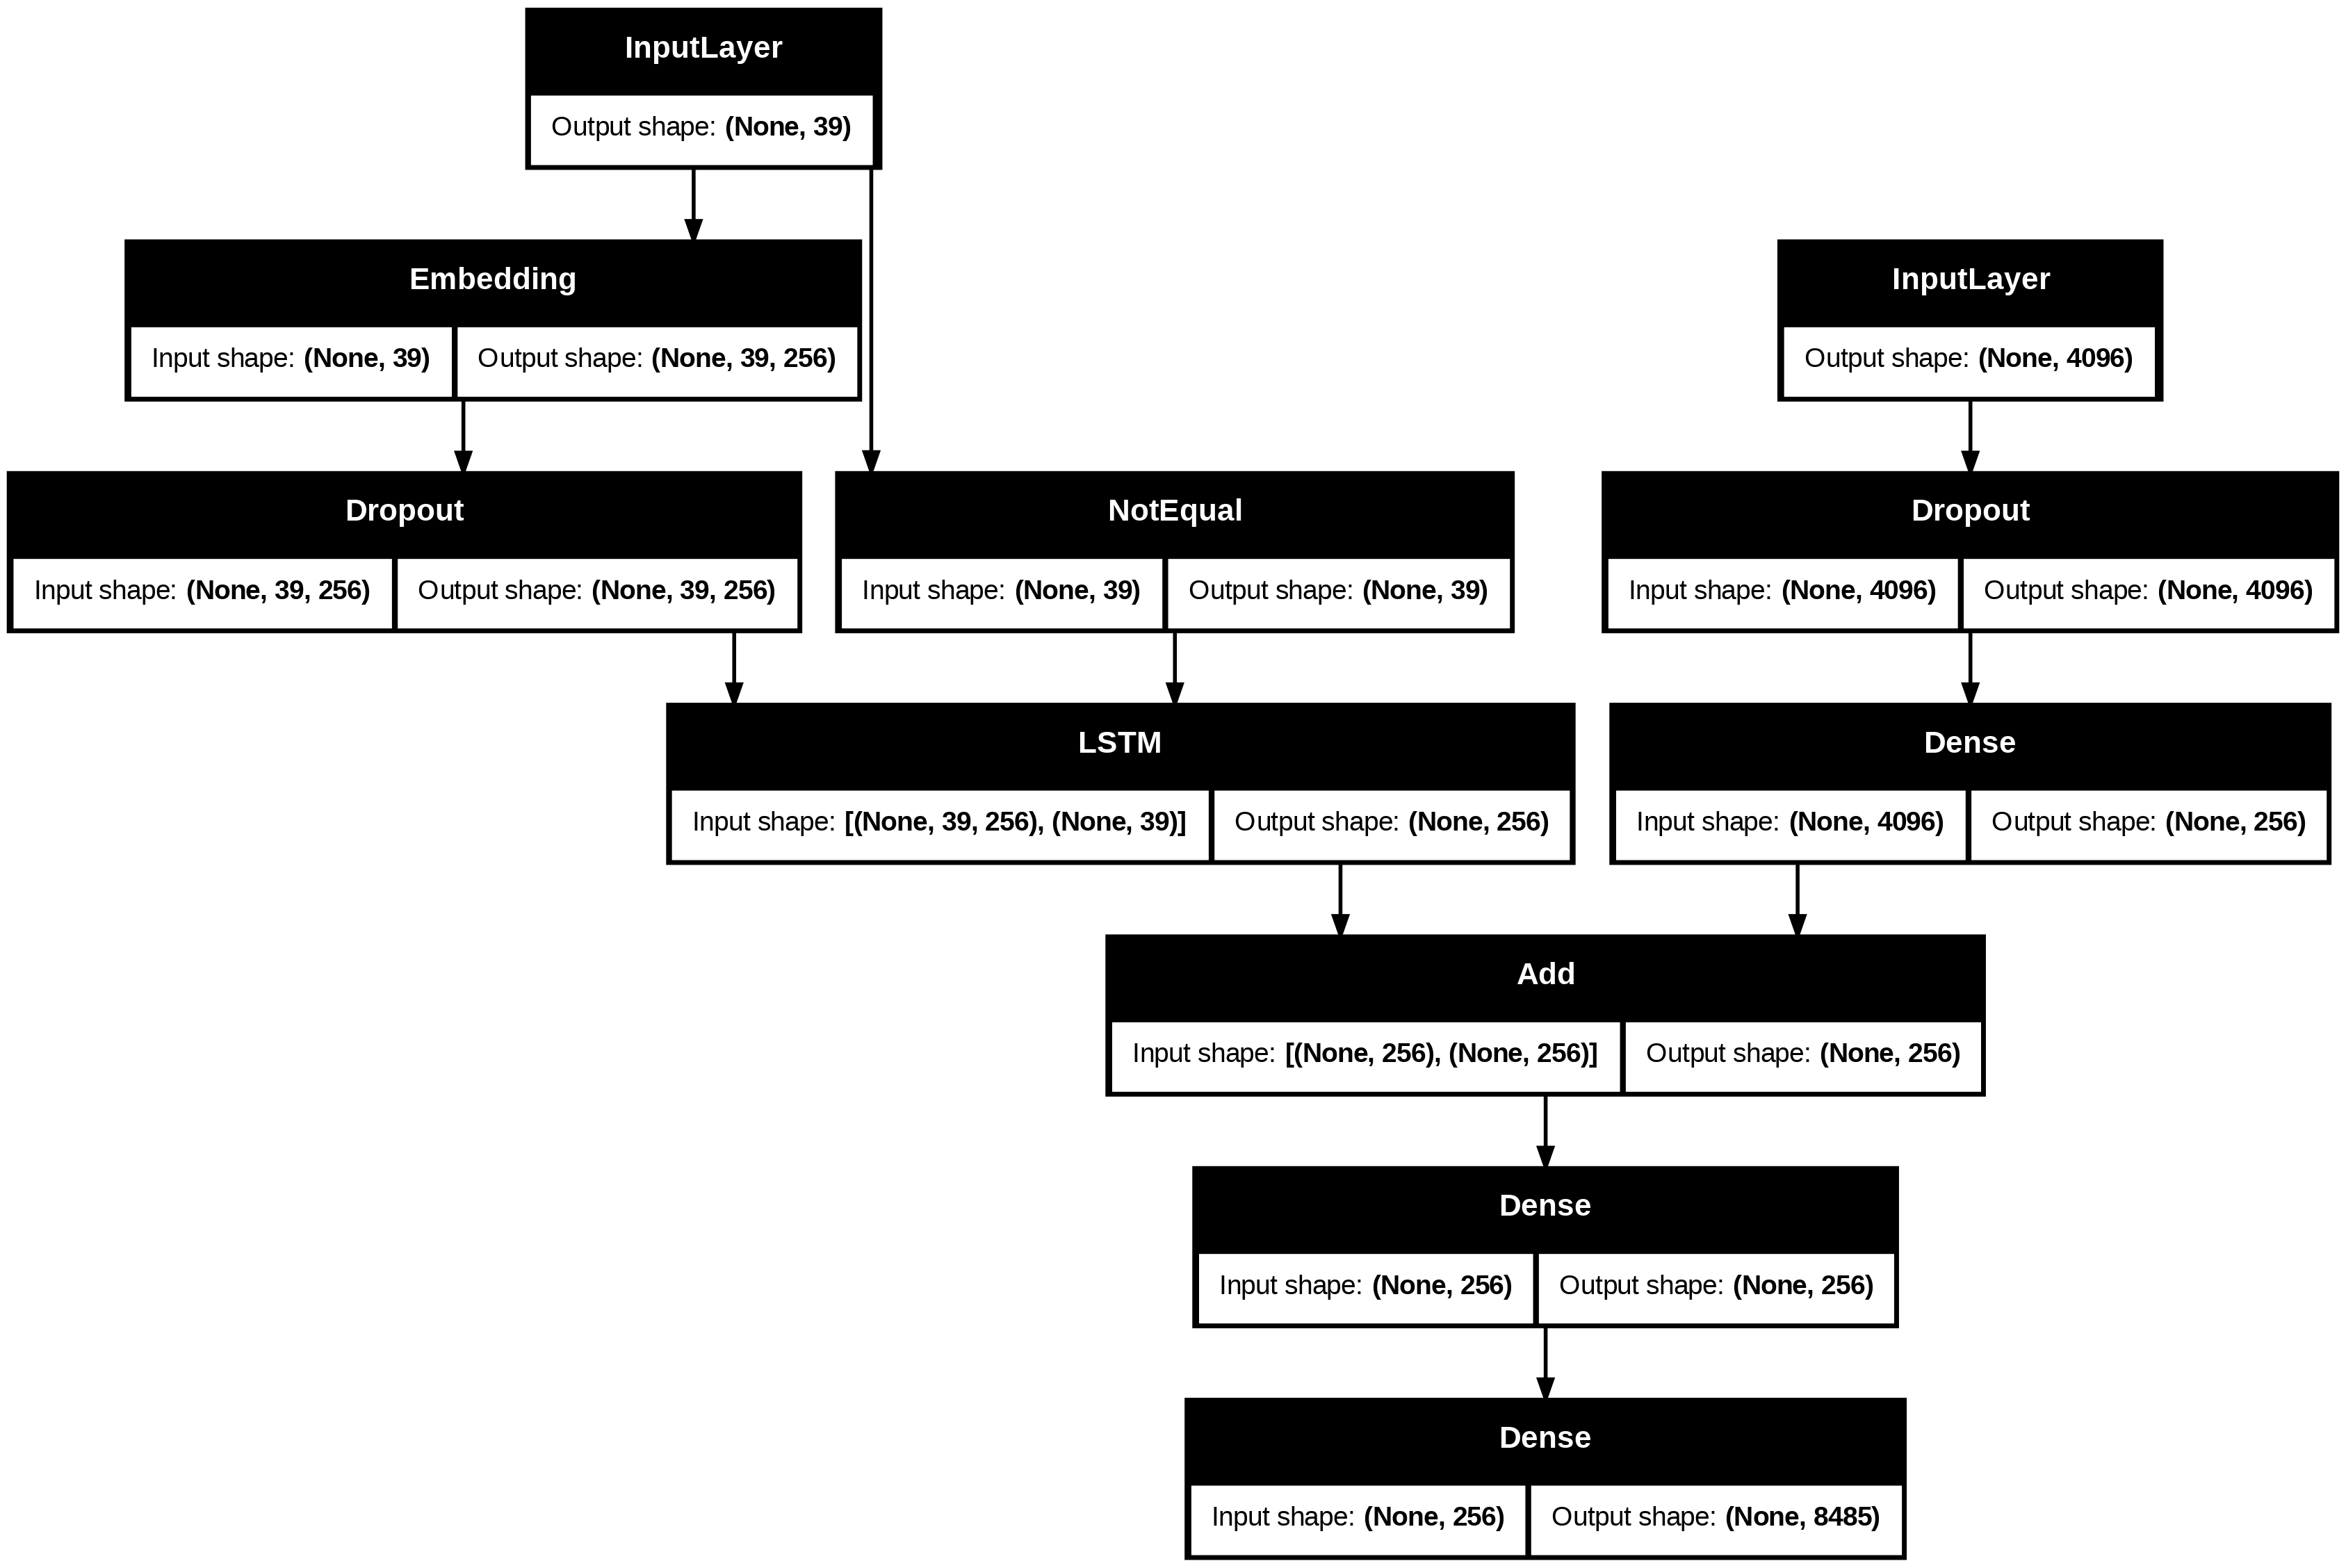

In [97]:

inputs1 = Input(shape=(4096,), name="images")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)

se3 = LSTM(256, use_cudnn=False)(se2)


decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')


plot_model(model, show_shapes=True)


In [98]:

epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):

    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 198s 849ms/step - loss: 3.3676
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - loss: 0.6111
227/227 ━━━━━━━━━━━━━━━━━━━━ 78s 344ms/step - loss: 0.2198
227/227 ━━━━━━━━━━━━━━━━━━━━ 85s 374ms/step - loss: 0.1794
227/227 ━━━━━━━━━━━━━━━━━━━━ 67s 295ms/step - loss: 0.1690
227/227 ━━━━━━━━━━━━━━━━━━━━ 67s 293ms/step - loss: 0.1638
227/227 ━━━━━━━━━━━━━━━━━━━━ 66s 291ms/step - loss: 0.1619
227/227 ━━━━━━━━━━━━━━━━━━━━ 65s 286ms/step - loss: 0.1581
227/227 ━━━━━━━━━━━━━━━━━━━━ 67s 297ms/step - loss: 0.1575
227/227 ━━━━━━━━━━━━━━━━━━━━ 65s 284ms/step - loss: 0.1552
227/227 ━━━━━━━━━━━━━━━━━━━━ 67s 293ms/step - loss: 0.1548
227/227 ━━━━━━━━━━━━━━━━━━━━ 67s 295ms/step - loss: 0.1538
227/227 ━━━━━━━━━━━━━━━━━━━━ 70s 308ms/step - loss: 0.1533
227/227 ━━━━━━━━━━━━━━━━━━━━ 78s 342ms/step - loss: 0.1530
227/227 ━━━━━━━━━━━━━━━━━━━━ 97s 426ms/step - loss: 0.1526
227/227 ━━━━━━━━━━━━━━━━━━━━ 105s 465ms/step - loss: 0.1528
227/227 ━━━━━━━━━━━━━━━━━━━━ 111s 490ms/step - loss: 0

In [73]:
model.save(WORKING_DIR+'/best_model.keras')

In [74]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [99]:
def predict_caption(model, image, tokenizer, max_length):

    in_text = 'startseq'

    for i in range(max_length):

        sequence = tokenizer.texts_to_sequences([in_text])[0]

        sequence = pad_sequences([sequence], max_length)

        yhat = model.predict([image, sequence], verbose=0)

        yhat = np.argmax(yhat)

        word = idx_to_word(yhat, tokenizer)

        if word is None:
            break

        in_text += " " + word

        if word == 'endseq':
            break
    return in_text


In [100]:
from nltk.translate.bleu_score import corpus_bleu

from tqdm import tqdm
test = "test_data"

actual, predicted = list(), list()

for key in tqdm(test):

    if key in mapping:
        captions = mapping[key]

        y_pred = predict_caption(model, features[key], tokenizer, max_length)

        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()

        actual.append(actual_captions)
        predicted.append(y_pred)

        print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
        print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))


100%|██████████| 9/9 [00:00<00:00, 27473.61it/s]


In [101]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):

    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)

    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)


---------------------Actual---------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq
startseq man skis past another man displaying paintings in the snow endseq
startseq person wearing skis looking at framed pictures set up in the snow endseq
startseq skier looks at framed pictures in the snow next to trees endseq
startseq startseq startseq man on skis looking at artwork for sale in the snow endseq endseq endseq
--------------------Predicted--------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq


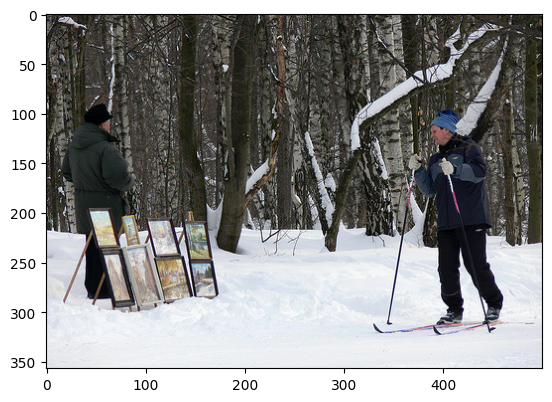

In [102]:
generate_caption("101669240_b2d3e7f17b.jpg")

In [93]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs,
                  outputs=vgg_model.layers[-2].output)

In [103]:
image_path = '/content/images/103106960_e8a41d64f8.jpg'
# load image
image = load_img(image_path, target_size=(224, 224))
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image from vgg
image = preprocess_input(image)
# extract features
feature = vgg_model.predict(image, verbose=0)
# predict from the trained model
predict_caption(model, feature, tokenizer, max_length)

'startseq young kid playing the goalie in hockey rink endseq'

---------------------Actual---------------------
startseq "a girl paddling down large river as seen from behind her ." endseq
startseq woman kayaking down river endseq
startseq woman paddles boat down river endseq
startseq woman with paddle endseq
startseq startseq startseq woman with paddle sits in boat on the water endseq endseq endseq
--------------------Predicted--------------------
startseq woman paddles boat down river endseq


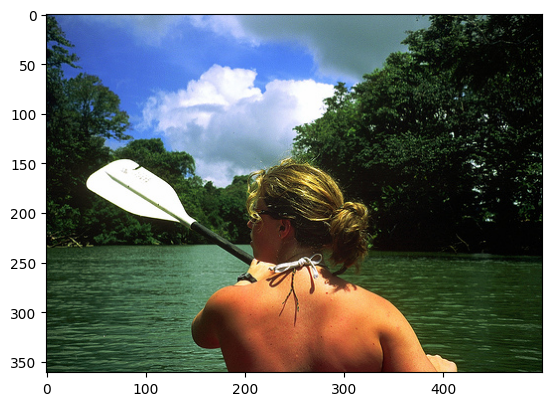

In [104]:
generate_caption("105342180_4d4a40b47f.jpg")

---------------------Actual---------------------
startseq climber wearing blue helmet and headlamp is attached to rope on the rock face endseq
startseq man climbs rocky wall endseq
startseq rock climber climbs large rock endseq
startseq woman in purple snakeskin pants climbs rock endseq
startseq startseq startseq person with blue helmet and purple pants is rock climbing endseq endseq endseq
--------------------Predicted--------------------
startseq man climbs rocky wall endseq


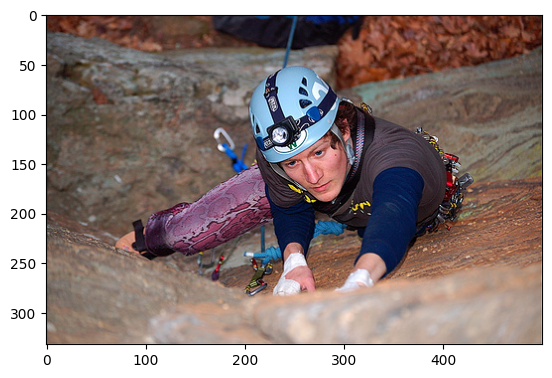

In [105]:
generate_caption("111537222_07e56d5a30.jpg")

---------------------Actual---------------------
startseq man holding onto ropes while boogie boarding endseq
startseq man holds onto ropes and is pulled through the water on his ski endseq
startseq man rides wakeboard attached to parachute endseq
startseq man windsurfing endseq
startseq startseq startseq the man is waterskiing endseq endseq endseq
--------------------Predicted--------------------
startseq startseq startseq two men standing on white their traveling into water covered pond endseq


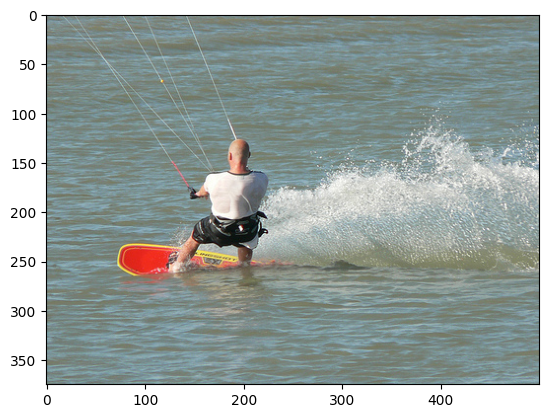

In [106]:
generate_caption("49553964_cee950f3ba.jpg")